### Simulated Annealing: Implementation and examples

#### WORKFLOW

1. First, we must define our objective function and the bounds on each input variable to the objective function. The objective function is just a Python function we will name objective(). The bounds will be a 2D array with one dimension for each input variable that defines the minimum and maximum for the variable.

2. Next, we can generate our initial point as a random point within the bounds of the problem, then evaluate it using the objective function. We need to maintain the “current” solution that is the focus of the search and that may be replaced with better solutions.

3. Now we can loop over a predefined number of iterations of the algorithm defined as “n_iterations“, such as 100 or 1,000. This requires a predefined “step_size” parameter, which is relative to the bounds of the search space. We will take a random step with a Gaussian distribution where the mean is our current point and the standard deviation is defined by the “step_size“. That means that about 99 percent of the steps taken will be within 3 * step_size of the current point. We don’t have to take steps in this way. You may wish to use a uniform distribution between 0 and the step size.

4. We then need to check if the evaluation of this new point is as good as or better than the current best point, and if it is, replace our current best point with this new point. This is separate from the current working solution that is the focus of the search.

5. Next, we need to prepare to replace the current working solution. The first step is to calculate the difference between the objective function evaluation of the current solution and the current working solution. Next, we need to calculate the current temperature, using the fast annealing schedule, where “temp” is the initial temperature provided as an argument. We can then calculate the likelihood of accepting a solution with worse performance than our current working solution.

6. Finally, we can accept the new point as the current working solution if it has a better objective function evaluation (the difference is negative) or if the objective function is worse, but we probabilistically decide to accept it.

In [30]:
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = [best_eval]
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]
 

### Temperature and acceptance criterion in fast annealing schedule

Before we apply the optimization algorithm to the problem, let’s take a moment to understand the acceptance criterion a little better.

First, the fast annealing schedule is an exponential function of the number of iterations. We can make this clear by creating a plot of the temperature for each algorithm iteration.

We will use an initial temperature of 10 and 100 algorithm iterations, both arbitrarily chosen.

The complete example is listed below.

Text(0, 0.5, 'Temperature')

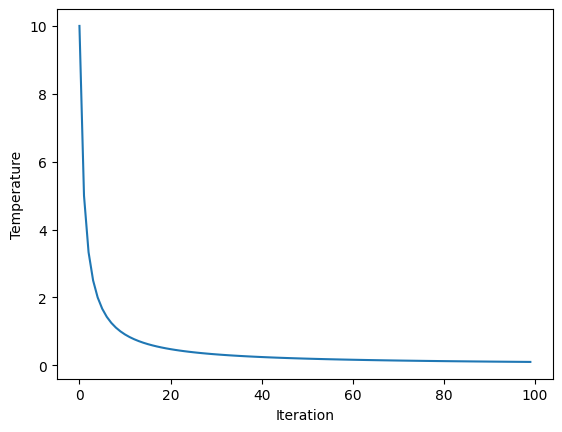

In [3]:
from matplotlib import pyplot

# total iterations of algorithm
iterations = 100

# initial temperature
initial_temp = 10

# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]

# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]

# plot iterations vs temperatures
pyplot.plot(iterations, temperatures)
pyplot.xlabel('Iteration')
pyplot.ylabel('Temperature')

Next, we can get a better idea of how the metropolis acceptance criterion changes over time with the temperature.

Recall that the criterion is a function of temperature, but is also a function of how different the objective evaluation of the new point is compared to the current working solution. As such, we will plot the criterion for a few different “differences in objective function value” to see the effect it has on acceptance probability.

Running the example calculates the metropolis acceptance criterion for each algorithm iteration using the temperature shown for each iteration (shown in the previous section).

The plot has three lines for three differences between the new worse solution and the current working solution.

We can see that the worse the solution is (the larger the difference), the less likely the model is to accept the worse solution regardless of the algorithm iteration, as we might expect. We can also see that in all cases, the likelihood of accepting worse solutions decreases with algorithm iteration.

The complete example is listed below.

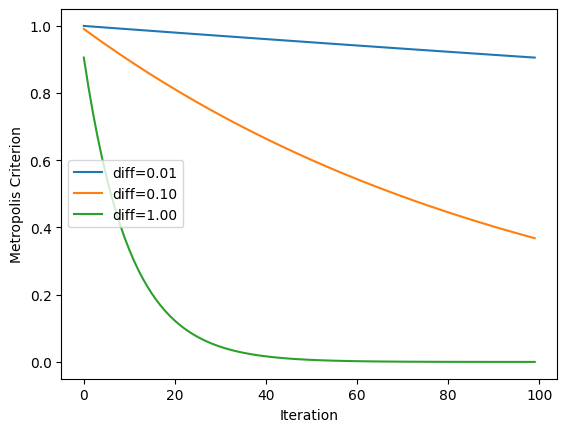

In [5]:
# explore metropolis acceptance criterion for simulated annealing
from math import exp
from matplotlib import pyplot

# total iterations of algorithm
iterations = 100

# initial temperature
initial_temp = 10

# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]

# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]

# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
 metropolis = [exp(-d/t) for t in temperatures]

 # plot iterations vs metropolis
 label = 'diff=%.2f' % d
 pyplot.plot(iterations, metropolis, label=label)

# inalize plot
pyplot.xlabel('Iteration')
pyplot.ylabel('Metropolis Criterion')
pyplot.legend()

### EXAMPLE 1

We will use a simple one-dimensional x^2 objective function with the bounds [-5, 5].

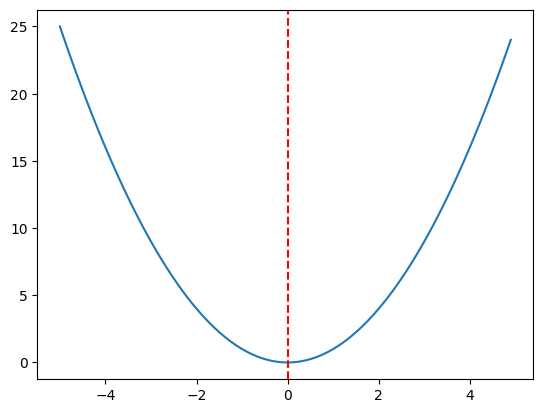

In [2]:
# convex unimodal optimization function
from numpy import arange
from matplotlib import pyplot
 
# objective function
def objective(x):
 return x[0]**2.0
 
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')

In this case, we will search for 1,000 iterations of the algorithm and use a step size of 0.1. Given that we are using a Gaussian function for generating the step, this means that about 99 percent of all steps taken will be within a distance of (0.1 * 3) of a given point, e.g. three standard deviations.

We will also use an initial temperature of 10.0. The search procedure is more sensitive to the annealing schedule than the initial temperature, as such, initial temperature values are almost arbitrary.

In [18]:
# objective function
def objective(x):
 return x[0]**2.0

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000


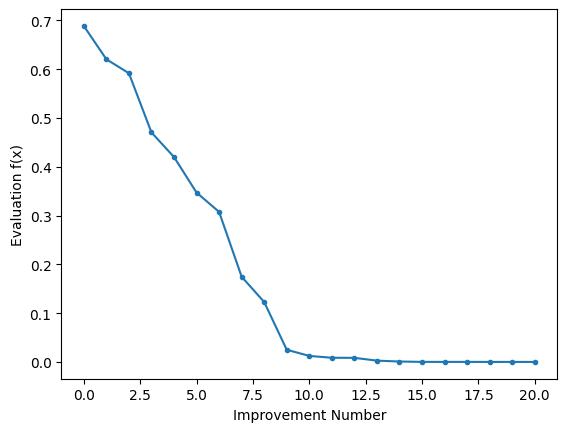

In [31]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# seed the pseudorandom number generator
seed(1)

# define range for input
bounds = asarray([[-5.0, 5.0]])

# define the total iterations
n_iterations = 1000

# define the maximum step size
step_size = 0.1

# initial temperature
temp = 10

# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

...
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

### EXAMPLE 2 - DIFFERENT IMPLEMENTATION

In [76]:
def simulated_annealing2(objective_function, upper_bounds, lower_bounds, computing_time, cooling, number_variables, initial_temperature):

    # Simulated Annealing Algorithm:
    initial_solution=np.zeros((number_variables))
    for v in range(number_variables):
        initial_solution[v] = random.uniform(lower_bounds[v],upper_bounds[v])
        
    current_solution = initial_solution
    best_solution = initial_solution
    n = 1  # no of solutions accepted
    best_fitness = objective_function(best_solution)
    current_temperature = initial_temperature # current temperature
    start = time.time()
    no_attempts = 1000 # number of attempts in each level of temperature
    record_best_fitness =[]
    
    for i in range(9999999):
        for j in range(no_attempts):
    
            for k in range(number_variables):
                current_solution[k] = best_solution[k] + 0.1*(random.uniform(lower_bounds[k],upper_bounds[k]))
                current_solution[k] = max(min(current_solution[k], upper_bounds[k]), lower_bounds[k])

            current_fitness = objective_function(current_solution)
            E = abs(current_fitness - best_fitness)
            if(i == 0 and j == 0):
                EA = E
            
            if current_fitness < best_fitness: # maximize or minimize

                p = np.exp(-E/(EA*current_temperature))
                # make a decision to accept the worse solution or not
                if random.random() < p:
                    accept = True # this worse solution is accepted
                else:
                    accept = False # worse solution not accepted
            else:
                accept = True # accept better solution
                
            if accept:
                best_solution = current_solution # update best soluton
                best_fitness = objective_function(current_solution)
                n = n + 1 # number of accepted solutions
                EA = (EA * (n-1) + E)/n # update EA

        print('Iteration: {}, best solution: {}, best_fitness: {}'.format(i, best_solution, best_fitness))
        record_best_fitness.append(best_fitness)

        # cooling the temperature
        current_temperature = current_temperature*cooling
        # Stop by time
        end = time.time()
        if(end-start > computing_time):
            break

    return(best_solution, record_best_fitness)


In [51]:
def objective_function(X):
    x=X[0]
    y=X[1]
    value = 3*(1-x)**2*np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) -1/3*np.exp(-(x+1)**2 - y**2)
    return value

Iteration: 0, best solution: [0.7770944  1.46328411], best_fitness: 4.5100978506350105
Iteration: 1, best solution: [-2.22106179 -2.52792746], best_fitness: 0.007845004435244654
Iteration: 2, best solution: [-1.55762095  0.83659802], best_fitness: -1.40387511654055
Iteration: 3, best solution: [-1.34497526 -2.20076827], best_fitness: -0.05763081372083402
Iteration: 4, best solution: [-0.03274054  1.09366528], best_fitness: 4.746041147223024
Iteration: 5, best solution: [1.63632527 2.71135281], best_fitness: 0.06641174456646144
Iteration: 6, best solution: [-3.          1.36579237], best_fitness: -0.005059797733913986
Iteration: 7, best solution: [-0.04015309 -0.594525  ], best_fitness: 2.1911603438028227
Iteration: 8, best solution: [ 0.22761185 -1.46672804], best_fitness: -6.177260249897418
Iteration: 9, best solution: [ 2.28896565 -1.04241236], best_fitness: 0.21074597946536364
Iteration: 10, best solution: [-2.84879109  1.74472327], best_fitness: -0.0014221232548991985
Iteration: 11

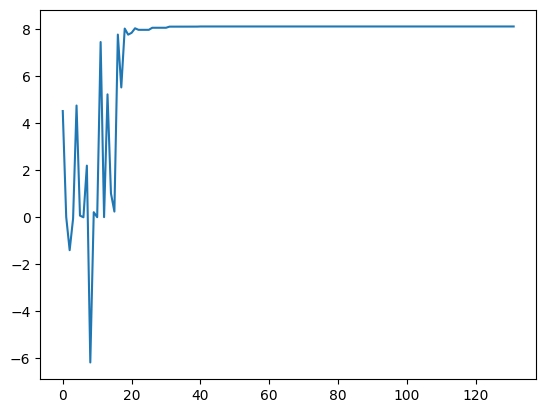

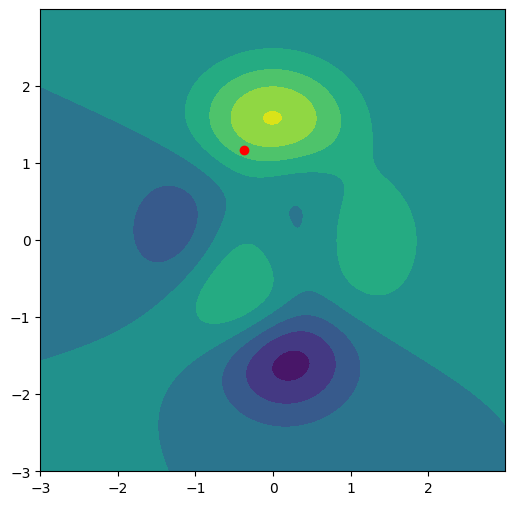

In [93]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------
# Customization section:
initial_temperature = 100
cooling = 0.8  # cooling coefficient
number_variables = 2
upper_bounds = [3, 3]   
lower_bounds = [-3, -3]  
computing_time = 2 # second(s)

  
best_solution, record_best_fitness = simulated_annealing2(objective_function, upper_bounds, lower_bounds, computing_time, cooling, number_variables, initial_temperature)

plt.plot(record_best_fitness)

x = np.arange(lower_bounds[0], upper_bounds[0], 0.01)
y = np.arange(lower_bounds[1], upper_bounds[1], 0.01)

XX, YY = np.meshgrid(x, y)

ZZ = objective_function([XX,YY])

fig, ax = plt.subplots(figsize = (6, 6))

cont = ax.contourf(XX, YY, ZZ)

ax.scatter(best_solution[0], best_solution[1], color = "red")

# SET THE CONTOUR LABELS
# plt.clabel(cont, fmt = '%d')


### Exercise Application to food industry

Como se trata de un producto de la industria alimenticia, se debe emplear acero inoxidable. Comercialmente la lámina disponible tiene una dimensión de 1 m x 1 m. Dado su elevado costo es necesario minimizar el desperdicio de material, a la vez que se obtiene de cada lámina la mayor cantidad de piezas descritas anteriormente. El problema consiste entonces en encontrar las piezas a fabricar, su ubicación y orientación dentro de la lámina, indicando el área desperdiciada.



### Exercise Application to TSP

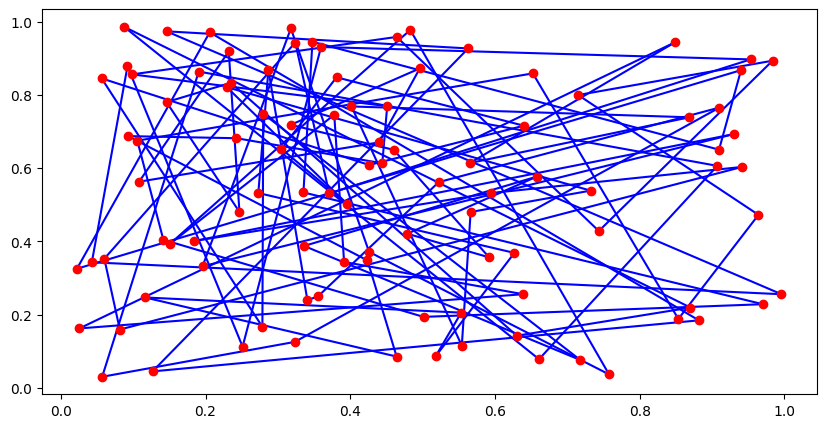

In [9]:
import numpy as np
import matplotlib.pyplot as plt


class Coordinate:
    def __init__(self, x ,y):
        self.x = x
        self.y = y
        
    @staticmethod
    def get_distance(a, b):
        return np.sqrt(np.abs(a.x - b.x)+np.abs(a.y - b.y))

    @staticmethod
    def get_total_distance(coords):
        dist = 0
        for first, second in zip(coords[:-1], coords[1:]):
            dist += Coordinate.get_distance(first, second)

        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist
    
if __name__ == '__main__':
    # Fill coordinates
    coords = []
    for i in range(100):
        coords.append(Coordinate(np.random.uniform(), np.random.uniform()))
    
    # Plot
    fig = plt.figure(figsize = (10,5))
    ax1 = fig.add_subplot(111)

    for first, second in zip(coords[:-1], coords[1:]):

        ax1.plot([first.x, second.x], [first.y, second.y], 'b')

    ax1.plot([coords[0].x, coords[-1].x], [ coords[0].y,  coords[-1].y], 'b')

    for c in coords:
        ax1.plot(c.x, c.y, 'ro')

0 cost =  34.31773030272236
1 cost =  80.82947477731919
2 cost =  75.87013585886854
3 cost =  75.10160429748079
4 cost =  80.32067971940862
5 cost =  80.32405460563274
6 cost =  78.48829827063422
7 cost =  78.83270787808897
8 cost =  81.21940141815686
9 cost =  76.3120566906651
10 cost =  80.5808735661609
11 cost =  80.82368324603968
12 cost =  83.24673027007746
13 cost =  73.92248000250916
14 cost =  77.6598044172781
15 cost =  77.69107474333848
16 cost =  80.36870139925672
17 cost =  80.24877994674512
18 cost =  74.80368701360915
19 cost =  80.01057575338079
20 cost =  80.43806959458624
21 cost =  76.2580506210829
22 cost =  80.01353800278403
23 cost =  78.44419345074284
24 cost =  79.39185163120656
25 cost =  79.95297095662559
26 cost =  80.67196318014905
27 cost =  78.67772673457385
28 cost =  78.7106519906543
29 cost =  77.52028099360203
30 cost =  75.45200060391365
31 cost =  76.81381599006956
32 cost =  77.49123581203978
33 cost =  76.71024308905417
34 cost =  75.73536808547175


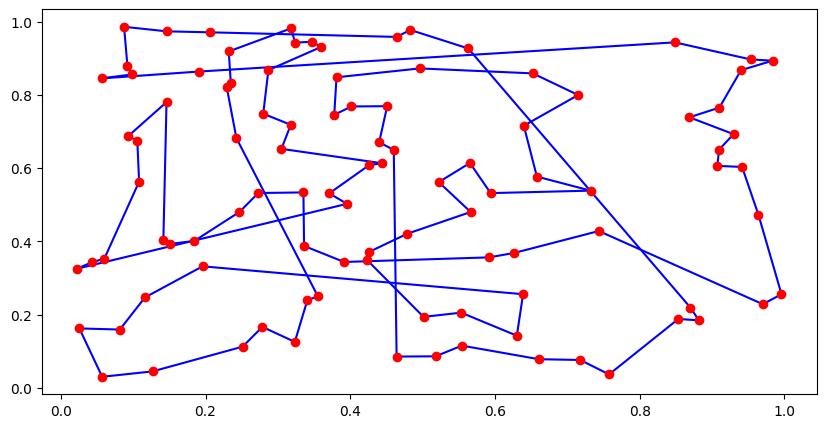

In [12]:
# Simulated annealing algorithm

best_costs = []
temps = []
probs = []

cost0 = Coordinate.get_total_distance(coords)

T = 100
factor = 0.99
T_init = T

for i in range(1000):
    print(i, "cost = ", cost0)

    T = T*factor
    temps.append(T)
    for j in range(300):
        # Exchange two coordinates and get a new neighbour solution
        r1, r2 = np.random.randint(0, len(coords), size = 2)
        
        temp = coords[r1]
        coords[r1] = coords[r2]
        coords[r2] = temp

        # Get the new cost
        cost1 = Coordinate.get_total_distance(coords)

        if cost1 < cost0:
            cost0 = cost1
        else:
            x = np.random.uniform()
            if x < np.exp((cost0-cost1)/T):
                cost0 = cost1
            else:
                temp = coords[r1]
                coords[r1] = coords[r2]
                coords[r2] = temp

        probs.append(np.exp((cost0-cost1)/T))

    best_costs.append(cost0)


# Plot results

fig = plt.figure(figsize = (10,5))
ax2 = fig.add_subplot(111)

for first, second in zip(coords[:-1], coords[1:]):

    ax2.plot([first.x, second.x], [first.y, second.y], 'b')

ax2.plot([coords[0].x, coords[-1].x], [ coords[0].y,  coords[-1].y], 'b')

for c in coords:
    ax2.plot(c.x, c.y, 'ro')


(array([118161.,   4375.,   3104.,   2515.,   2157.,   1888.,   1794.,
          1619.,   1514., 162873.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

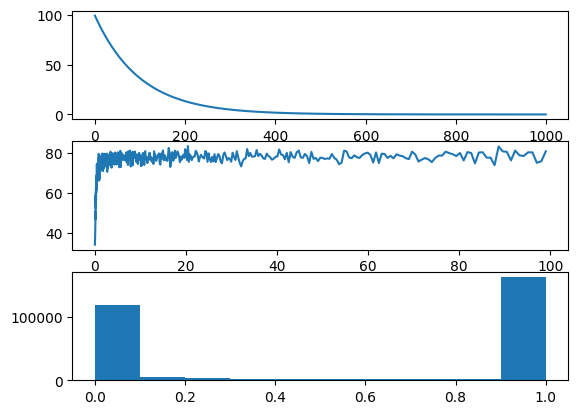

In [17]:
plt.subplot(3,1,1)

plt.plot(range(len(temps)), temps)

plt.subplot(3,1,2)

plt.plot(range(len(best_costs)), best_costs)

plt.subplot(3,1,3)

plt.scatter(range(len(probs)), probs)